## The assignment steps in not in exact order as described in the Syllabus, nonetheless every steps is well titled

In [1]:
# Import packages:
import math 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from prettytable import PrettyTable
from sklearn.model_selection import learning_curve

### (a) Generate 20 data pairs (X, Y) using y = sin(2 * pi * X) + N 
   * Use uniform distribution between 0 and 1 for X
   *  Sample N from the normal gaussian distribution 
   * Use 10 for train and 10 for test 
   
(b) Using root mean square error, find weights of polynomial regression for order is 0, 1, 3, 9
  
### (d) Draw a chart of fit data

All these steps are below : 


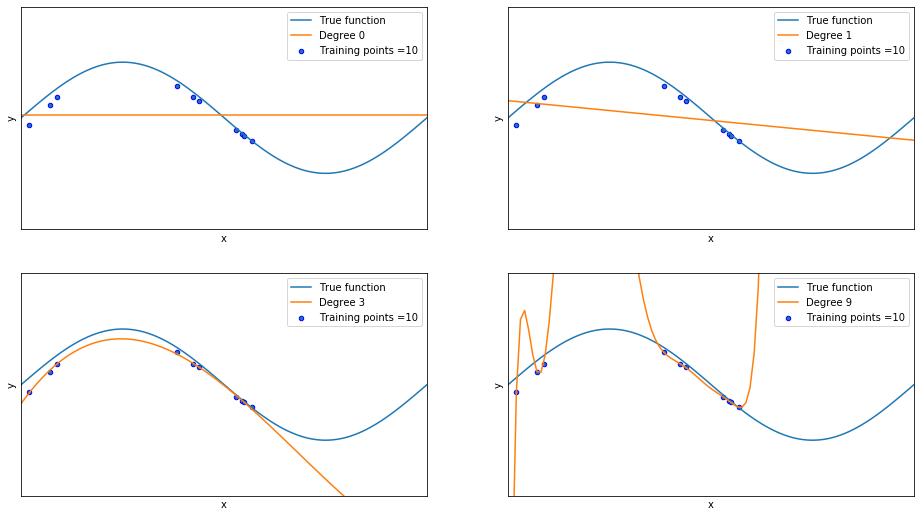

In [2]:
# Provide data: Generate 20 data pairs (X, Y) using y = sin(2*pi*X) + N 


def true_fun(X):
    return np.sin(2* np.pi * X)


np.random.seed(0)

x = np.sort(np.random.uniform(low=0.0, high=1.0, size=20))   # Use uniform distribution between 0 and 1 for X 
y = true_fun(x) + np.sort(np.random.normal(size=20))*0.1      # Sample N from the normal gaussian distribution


# Use 10 points for train set  and 10 points for test set
x_train = x[:10]
x_test = x[10:]


y_train = y[:10]
y_test = y[10:]


X_train = x_train[:, np.newaxis] # transform x_train

degrees = [ 0, 1, 3, 9]     # polynomial regression for order is 0, 1, 3, 9


plt.figure(figsize=(16, 9))
for i in range(len(degrees)):
    ax = plt.subplot(2, len(degrees)/2, i + 1)
    plt.setp(ax, xticks=(), yticks=())
    
    lr=LinearRegression() 
    model = make_pipeline(PolynomialFeatures(degree=degrees[i]), LinearRegression())
    model.fit(x_train[:, np.newaxis], y_train)      # Transform input data: transforming the data to include another axis and fit the model 

    
    scores = cross_val_score(model, x[:, np.newaxis], y, scoring="neg_mean_squared_error", cv=10)   # Evaluate the models using crossvalidation

    X_test = np.linspace(0, 1, 100)  # generate data to plot the true function 

    plt.plot(X_test,true_fun(X_test), label="True function")
    plt.plot(X_test, model.predict(X_test[:, np.newaxis]), label="Degree %d" % degrees[i])   # Predict 
    plt.scatter(x_train, y_train, edgecolor='b', s=20, label="Training points =10")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="upper right")
    #plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})  RMSE= {:.2e}".format(degrees[i], -scores.mean(), scores.std(), np.sqrt(-scores.mean())))    # Calculate the RMSE Root Mean Square Error 
plt.show()

### (b) Using root mean square error, find weights of polynomial regression for order is 0, 1, 3 and  9. 

In [3]:
# Calculate the Root Mean Square Error RMSE for each polynomial degree 0, 1, 3 and 9:

model = make_pipeline(PolynomialFeatures(0), LinearRegression())
model.fit(X_train, y_train)
y_predict0 = model.predict(x_test[:, np.newaxis])
RMSE0 = np.sqrt(mean_squared_error(y_test,y_predict0))
print(RMSE0)


model = make_pipeline(PolynomialFeatures(1), LinearRegression())
model.fit(X_train, y_train)
y_predict1 = model.predict(x_test[:, np.newaxis])
RMSE1 = np.sqrt(mean_squared_error(y_test,y_predict1))
print(RMSE1)


model = make_pipeline(PolynomialFeatures(3), LinearRegression())
model.fit(X_train, y_train)
y_predict3 = model.predict(x_test[:, np.newaxis])
RMSE3 = np.sqrt(mean_squared_error(y_test,y_predict3))
print(RMSE3)


model = make_pipeline(PolynomialFeatures(9), LinearRegression())
model.fit(X_train, y_train)
y_predict9 = model.predict(x_test[:, np.newaxis])
RMSE9 = np.sqrt(mean_squared_error(y_test,y_predict9))
print(RMSE9)

test_error= [RMSE0, RMSE1, RMSE3, RMSE9 ]

0.7396012181666293
0.505264453165575
1.648582774943097
20457.668538676455


In [4]:
#Evaluate the model for each polynomial degree 0, 1, 3 and 9:

model = make_pipeline(PolynomialFeatures(0), LinearRegression())
model.fit(X_train, y_train)
s0= model.score(X_train, y_train)
print (s0)

model = make_pipeline(PolynomialFeatures(1), LinearRegression())
model.fit(X_train, y_train)
s1= model.score(X_train, y_train)
print (s1)

model = make_pipeline(PolynomialFeatures(3), LinearRegression())
model.fit(X_train, y_train)
s3= model.score(X_train, y_train)
print (s3)


model = make_pipeline(PolynomialFeatures(9), LinearRegression())
model.fit(X_train, y_train)
s9= model.score(X_train, y_train)
print (s9)

train_error= [s0, s1, s3, s9]




0.0
0.1848233925227455
0.9967851198922512
1.0


### (c) Display weights in table 

In [5]:
# Get results

degrees = [0,1,3,9]
for i in range(len(degrees)):
    x_ = PolynomialFeatures(degree= degrees[i]).fit_transform(x.reshape((-1, 1)))
    model = LinearRegression().fit(x_, y)
    r_sq = model.score(x_, y)
    intercept, coefficients = model.intercept_, model.coef_
    #y_pred = model.predict(x_)
    #print("intercept:",intercept)
    print("coefficients:", coefficients,"\n")
    
 

coefficients: [0.] 

coefficients: [ 0.         -1.04546644] 

coefficients: [  0.          12.86957272 -36.46043638  24.56564118] 

coefficients: [ 0.00000000e+00  2.55702180e+00  7.65672916e+01 -3.38123900e+02
 -3.02351580e+02  4.53438371e+03 -1.17292557e+04  1.44454326e+04
 -8.86728424e+03  2.17872788e+03] 



In [6]:
#!pip install PrettyTable
#!python -m pip install --upgrade pip   

    
x = PrettyTable()

x.field_names = ["coefficients", "M=0", "M=1", "M=3", "M=9"]

x.add_row(["w0",0., 0., 0.,                      0.])
x.add_row(["w1",'' ,-1.04546644, 12.86957272, 2.55702180e+00])
x.add_row(["w2",'' , '', -36.46043638,     7.65672916e+01 ])
x.add_row(["w3",'' , '', 24.56564118,          -3.38123900e+02])
x.add_row(["w4",'' , '','',          -3.02351580e+02])
x.add_row(["w5",'' , '', '',          4.53438371e+03])
x.add_row(["w6",'' , '', '',          -1.17292557e+04])
x.add_row(["w7",'' , '', '',           1.44454326e+04])
x.add_row(["w8",'' , '', '',           -8.86728424e+03])
x.add_row(["w9",'' , '', '',            2.17872788e+03])


print(x)   

+--------------+-----+-------------+--------------+-------------+
| coefficients | M=0 |     M=1     |     M=3      |     M=9     |
+--------------+-----+-------------+--------------+-------------+
|      w0      | 0.0 |     0.0     |     0.0      |     0.0     |
|      w1      |     | -1.04546644 | 12.86957272  |  2.5570218  |
|      w2      |     |             | -36.46043638 |  76.5672916 |
|      w3      |     |             | 24.56564118  |  -338.1239  |
|      w4      |     |             |              |  -302.35158 |
|      w5      |     |             |              |  4534.38371 |
|      w6      |     |             |              | -11729.2557 |
|      w7      |     |             |              |  14445.4326 |
|      w8      |     |             |              | -8867.28424 |
|      w9      |     |             |              |  2178.72788 |
+--------------+-----+-------------+--------------+-------------+


### (e) Draw train error vs test error

In [30]:
train_error =list()   #np.array([])
test_error  =list()   

degrees = [0,1,2,3,4,5,6,7,8,9]
for i in range(len(degrees)):
    model = make_pipeline(PolynomialFeatures(degree=degrees[i]), LinearRegression())
    model.fit(X_train, y_train)
    y_predict = model.predict(x_test[:, np.newaxis])
    train_error = np.append(train_error, model.score(X_train, y_train))
    test_error  = np.append(test_error, np.sqrt(mean_squared_error(y_test,y_predict))) #model.score(x_test, y_test))   #np.sqrt(metrics.mean_squared_error(y_test,y_predict))
    
    
print ("train_error= ", train_error, "\n\n") 
print("test_error= ", test_error, "\n") 

train_error=  [0.         0.18482339 0.98606087 0.99678512 0.99944883 0.99955333
 0.99998181 0.99998183 0.99999754 1.        ] 


test_error=  [7.39601218e-01 5.05264453e-01 3.12963033e+00 1.64858277e+00
 2.87122909e+00 2.08585640e+00 3.20289695e+01 2.93359954e+01
 8.28417066e+02 2.04576685e+04] 



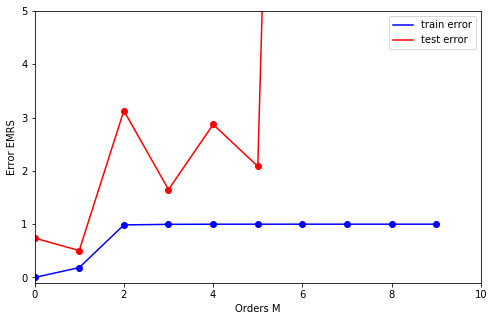

In [32]:
order = np.linspace(0, 9, 10)
plt.figure(figsize=(8, 5))
plt.ylim([-0.1, 5])               #([0, 2.2])   #(-3.1 ,5.2)   #(-10 ,50)  #(-1,2.1)  # (-1,3.7)   
plt.xlim(0,10)


plt.plot(order, train_error, label = "train error", color = 'blue')
plt.scatter(order, train_error,marker='o', color = 'blue')
plt.plot(order, test_error, label = "test error", color = 'red')
plt.scatter(order, test_error,marker='o', color = 'red')

plt.xlabel('Orders M')
plt.ylabel('Error EMRS')
plt.legend()

## (f) Now generate 100 more data and fit 9th order model and draw fit


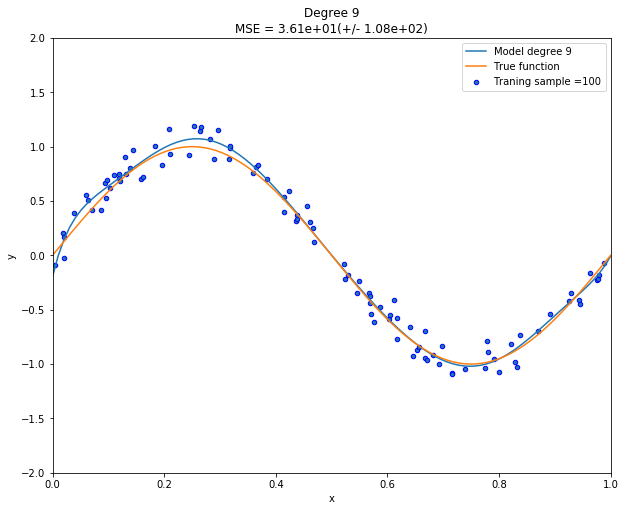

In [9]:
def true_fun(X):
    return np.sin(2* np.pi * X)

np.random.seed(0)
n_samples = 100


X = np.sort(np.random.uniform(low=0.0, high=1.0, size=n_samples))
y = true_fun(X) + np.random.normal(size=100) * 0.1      

#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

lr=LinearRegression()
model = make_pipeline(PolynomialFeatures(9), LinearRegression())
model.fit(X[:, np.newaxis], y)

    # Evaluate the models using crossvalidation
#scores = cross_val_score(model, X[:, np.newaxis], y, scoring="neg_mean_squared_error", cv=10)

X_test = np.linspace(0, 1, 100)
plt.figure(figsize=(10, 8))
plt.plot(X_test, model.predict(X_test[:, np.newaxis]), label="Model degree %d" % degrees[i])
plt.plot(X_test, true_fun(X_test), label="True function")
plt.scatter(X, y, edgecolor='b', s=20, label="Traning sample =100")
plt.xlabel("x")
plt.ylabel("y")
plt.xlim((0, 1))
plt.ylim((-2, 2))
plt.legend(loc="best") 
plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(9, -scores.mean(), scores.std()))
plt.show()


## (g) Now we will regularize using the sum of weights. 
## (h) Draw chart for lambda is 1, 1/10, 1/100, 1/1000, 1/10000, 1/100000 

Training Score : 0.9208086456593761
Test Score: -777743.3341704924


Training Score : 0.9895658639742149
Test Score: -786071.828825875


Training Score : 0.9989919044160872
Test Score: -426145.95397051575


Training Score : 0.9999471024563109
Test Score: -4864.400753869144


Training Score : 0.9999794051555922
Test Score: -28472.2746544685


Training Score : 0.9999846731182347
Test Score: -317551.11888090643




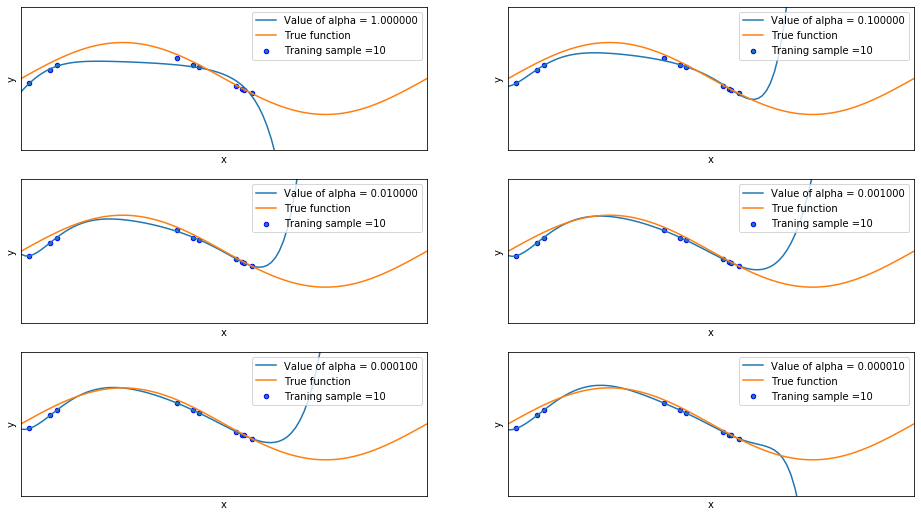

In [10]:
plt.figure(figsize=(16, 9))

alpha= [ 1, 1/10, 1/100, 1/1000, 1/10000, 1/100000 ]
for i in range(len(alpha)):
    steps = [
    ('scalar', StandardScaler()),
    ('poly', PolynomialFeatures(degree=9)),
    ('model', Ridge(alpha=alpha[i], fit_intercept=True))
    ]

    ridge_pipe = Pipeline(steps)
    ridge_pipe.fit(X_train, y_train)

    print('Training Score : {}'.format(ridge_pipe.score(X_train, y_train)))
    print('Test Score: {}'.format(ridge_pipe.score(x_test[:, np.newaxis], y_test)))
    print('\n')
    
    ax = plt.subplot(3, 2, i + 1)
    plt.setp(ax, xticks=(), yticks=())
    plt.plot(X_test, ridge_pipe.predict(X_test[:, np.newaxis]), label="Value of alpha = %.6f" % alpha[i])
    plt.plot(X_test, true_fun(X_test), label="True function")
    plt.scatter(x_train, y_train, edgecolor='b', s=20, label="Traning sample =10")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="upper right") 
plt.show()

## (i) Now draw test  and train error according to lamda 

train_error=  [ 1.         -0.23676973 -0.09088939 -0.05611074 -0.04056828 -0.03176539] 


test_error=  [2.04576685e+04 9.49034067e-01 8.25676243e-01 7.93676848e-01
 7.79008765e-01 7.70596951e-01]


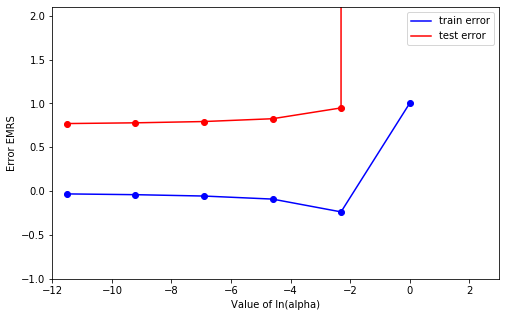

In [11]:
train_error =np.array([])
test_error  =np.array([])

alpha= [ np.log(1), np.log(1/10), np.log(1/100), np.log(1/1000), np.log(1/10000), np.log(1/100000) ]

for i in range(len(alpha)):
    model = make_pipeline(PolynomialFeatures(9), Ridge(alpha=alpha[i], fit_intercept=True))
    result= model.fit(X_train, y_train).score(X_train, y_train)
    result1= model.score(x_test[:, np.newaxis], y_test)
    y_predict = model.predict(x_test[:, np.newaxis])
    train_error = np.append(train_error, result)
    test_error  = np.append(test_error, np.sqrt(mean_squared_error(y_test,y_predict)) )  #model.score(x_test, y_test))
    
    
print ("train_error= ", train_error,"\n\n") 
print("test_error= ", test_error) 




order = np.linspace(-30, 0, 6)
plt.figure(figsize=(8, 5))
plt.ylim(-1,2.1)       #(-10 ,50)
plt.xlim(-12,3)

plt.plot(alpha, train_error, label = "train error", color = 'blue')
plt.scatter(alpha, train_error,marker='o', color = 'blue')
plt.plot(alpha, test_error, label = "test error", color = 'red')
plt.scatter(alpha, test_error,marker='o', color = 'red')

plt.xlabel('Value of ln(alpha)')
plt.ylabel('Error EMRS')
plt.legend()

## (j) Based on the best test performance, what is your model? 


## The best model we pick for this dataset is Polynomial of degree 9 with regularization parameter of alpha with a value equals to 1/10000. 

Training Score: 0.9999794051555922
Test Score: -28472.2746544685


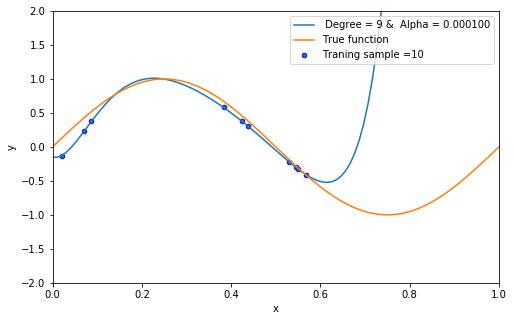

In [13]:
steps = [
    ('scalar', StandardScaler()),
    ('poly', PolynomialFeatures(degree=9)),
    ('model', Ridge(alpha=1/10000, fit_intercept=True))
]

ridge_pipe = Pipeline(steps)
ridge_pipe.fit(X_train, y_train)

print('Training Score: {}'.format(ridge_pipe.score(x_train[:, np.newaxis], y_train)))
print('Test Score: {}'.format(ridge_pipe.score(x_test[:, np.newaxis], y_test)))

plt.figure(figsize=(8, 5))
plt.plot(X_test, ridge_pipe.predict(X_test[:, np.newaxis]), label=" Degree = 9 &  Alpha = %.6f" %0.000100)
plt.plot(X_test, true_fun(X_test), label="True function")
plt.scatter(x_train, y_train, edgecolor='b', s=20, label="Traning sample =10")
plt.xlabel("x")
plt.ylabel("y")
plt.xlim((0, 1))
plt.ylim((-2, 2))
plt.legend(loc="upper right") 
plt.show()
